## Predicting Shipping Delay (Regression or Classification)

### Determine if an order will have a shipment delay by looking at the product, seller, and customer information.
 - Target: Create a target variable indicating whether the order is delayed or not by comparing the shipping_limit_date with the actual delivery date (if you have that data).
- Features: You can use other columns like price, freight_value, payment_type, product_category, seller_lat, seller_lng, customer_lat, customer_lng

## Step- by- Step

- Data Preparation:
Create a binary target feature: is_delayed.
Extract relevant features from the dataset.
Handle missing data and perform any necessary encoding.
Data Preprocessing:Convert categorical columns (payment_type, product_category_name_english, etc.) into numerical values using label encoding or one-hot encoding.
Normalize numerical features like price, freight_value, product_name_lenght.
Splitting Data:

- Split the data into training and test sets.
Train a Model:we can use models like Logistic Regression, Random Forest, or Gradient Boosting for classification tasks.
Evaluate the Model:

- Use metrics like accuracy, precision, recall, or F1-score.

# setting up the required libraries.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")


## Loading data sset.

In [30]:
df = pd.read_csv(r"C:\Users\Raju\Downloads\final_df_olist.csv")

In [31]:
df

,Row_No,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,...,payment_type,payment_installments,payment_value,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,product_category,cust_Region
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.90,13.29,58,598,...,credit_card,2,72.19,cool_stuff,-22.497188,-44.127324,-21.763186,-41.310265,Fashion,Southeast
1,1,5c94ad4e194c0e6794688a9d2b9ea94b,1,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,16-03-2018 18:50,29.90,18.23,55,388,...,boleto,1,48.13,health_beauty,-22.708485,-47.664918,-21.763186,-41.310265,Health and Beauty,Southeast
2,2,bd31b009e1dbc47fc7c250b1e2cf5440,1,92e2d2146e433cd4d1f09a3f8633ead0,4a3ca9315b744ce9f8e9374361493884,02-05-2018 03:51,52.90,22.95,53,714,...,boleto,1,75.85,bed_bath_table,-21.757225,-48.829541,-21.763186,-41.310265,Furniture,Southeast
3,3,bb4eb0196897c20281a61f75ce23211c,1,8cee1d824765335c48ccc515c2ecf4b8,4a3ca9315b744ce9f8e9374361493884,28-07-2017 14:50,96.00,15.42,54,385,...,credit_card,9,111.42,bed_bath_table,-21.757225,-48.829541,-21.763186,-41.310265,Furniture,Southeast
4,4,f9847bf9cc7336c6ba07fe2bdbb6cae1,1,3e5201fe0d1ba474d9b90152c83c706c,8160255418d5aaa7dbdc9f4c64ebda44,16-05-2018 18:30,125.90,13.30,56,255,...,credit_card,6,139.20,bed_bath_table,-21.757225,-48.829541,-21.763186,-41.310265,Furniture,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112632,117720,bb05bd3bbacf1e3c6026b43b44a6631c,1,a0425426bd812474106a782b2979e310,eb1bf309f4f6af9a97e9ddac3fdbeabe,29-05-2018 02:55,22.30,8.88,57,1417,...,boleto,1,31.18,sports_leisure,-23.702611,-46.596395,-23.570953,-46.624567,Entertainment,Southeast
112633,117721,c003c1face3c31cba0af4ab5314f3332,1,dedb5adefe63796ce6edd624d0ebd8a8,70ee69419916dc13e3aed619061f996c,18-08-2017 11:05,45.00,8.72,43,642,...,credit_card,5,53.72,furniture_decor,-23.520595,-46.178266,-23.456257,-46.937905,Furniture,Southeast
112634,117725,cec79ef92819a9f1f2009e1d8cf26db8,1,ae8a92195eb75e94998a210eeb51693e,1d139e3a3b14025640d8df1b230aace0,19-09-2017 12:35,7.48,15.10,43,513,...,credit_card,2,22.58,sports_leisure,-21.190973,-48.156353,-17.086066,-42.255281,Entertainment,Southeast
112635,117726,e9613fa6e02ff8ae45f37ca30b0468a1,1,f619f125af192e28da946f3382e783a6,9b00cad94ef3078faf6fba2e792c158f,27-12-2017 12:17,354.90,18.92,53,234,...,voucher,1,250.00,sports_leisure,-15.801399,-43.310325,-27.101374,-51.246351,Entertainment,South


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112637 entries, 0 to 112636
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Row_No                         112637 non-null  int64  
 1   order_id                       112637 non-null  object 
 2   order_item_id                  112637 non-null  int64  
 3   product_id                     112637 non-null  object 
 4   seller_id                      112637 non-null  object 
 5   shipping_limit_date            112637 non-null  object 
 6   price                          112637 non-null  float64
 7   freight_value                  112637 non-null  float64
 8   product_name_lenght            112637 non-null  int64  
 9   product_description_lenght     112637 non-null  int64  
 10  product_photos_qty             112637 non-null  int64  
 11  product_weight_g               112637 non-null  int64  
 12  product_length_cm             

### Step 1: Data Preprocessing:-

In [37]:
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

### Step 2: Create the target variable `is_delayed`:-
- Compare actual delivery date with the shipping limit date

In [38]:
df['is_delayed'] = (df['order_delivered_customer_date'] > df['shipping_limit_date']).astype(int)

### Step 3: Feature Selection :-

In [53]:
features = [
    'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 
    'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
    'product_width_cm', 'seller_lat', 'seller_lng', 'customer_lat', 'customer_lng',
    'payment_value']

### Convert categorical features to numerical using LabelEncoder 
- Here we can use  OneHotEncoder Too.

In [56]:
categorical_columns = ['payment_type', 'product_category_name_english', 'seller_city', 'seller_state', 'customer_city', 'customer_state']

In [58]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#### Add encoded categorical columns to features

In [60]:
features += categorical_columns

### Step 4: Handle missing values:-
-  As my data dont have null values  i have directly jumped in to normalization, train and test process

In [96]:
df.isna().sum().sum()

0

### Step 5: Data Normalization:-

In [63]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

### Step 6: Train-Test Split:-

In [65]:
X = df[features]
y = df['is_delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Step 7: Train the Random Forest Classifier:-

In [67]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 8: Model Evaluation:-

In [70]:
y_pred = clf.predict(X_test)

In [106]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8647904829545454


In [108]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.57      0.64      4720
           1       0.89      0.94      0.92     17808

    accuracy                           0.86     22528
   macro avg       0.81      0.75      0.78     22528
weighted avg       0.86      0.86      0.86     22528



###  Feature Importance:-

# Class Distribution:

#### Class 0 (not delayed): 4720 instances
#### Class 1 (delayed): 17808 instances
There are significantly more delayed orders (class 1) compared to non-delayed ones (class 0), indicating class imbalance.
Precision:

- Precision for class 0: 0.73 (73%)
This means that out of all predicted non-delayed orders, 73% were actually correct.
Precision for class 1: 0.89 (89%)
Out of all predicted delayed orders, 89% were correct.
The model is much better at correctly predicting delayed orders (class 1), showing higher precision for this class.

- Recall:
Recall for class 0: 0.57 (57%)
Out of all actual non-delayed orders, the model correctly identified 57%.
Recall for class 1: 0.94 (94%)
Out of all actual delayed orders, the model correctly identified 94%.
The model has a high recall for delayed orders, meaning it catches almost all true delayed orders but struggles with non-delayed ones.

- F1-Score:
F1-score for class 0: 0.64 (64%)
This is the harmonic mean of precision and recall for class 0. The low F1-score indicates the model struggles with correctly predicting non-delayed orders.
F1-score for class 1: 0.92 (92%)
The high F1-score for delayed orders suggests strong performance in predicting delays.

- Accuracy:
The overall accuracy of the model is 86%, which indicates that the model correctly predicts delays for 86% of the total orders in the dataset.

- Macro Average:
Precision (0.81): Averages precision for both classes, reflecting how well the model differentiates between delayed and non-delayed orders.
Recall (0.75): Averages recall across both classes, reflecting how well the model finds all instances of both delayed and non-delayed orders. The low recall for class 0 (57%) pulls this down.
F1-score (0.78): Reflects overall model performance by combining precision and recall across both classes.

- Weighted Average:
Precision, Recall, and F1-score (0.86): Weighted by the support (number of samples) of each class. Since there are more delayed orders, the weighted averages are close to class 1 performance, and overall model performance is highly influenced by its ability to predict delays.

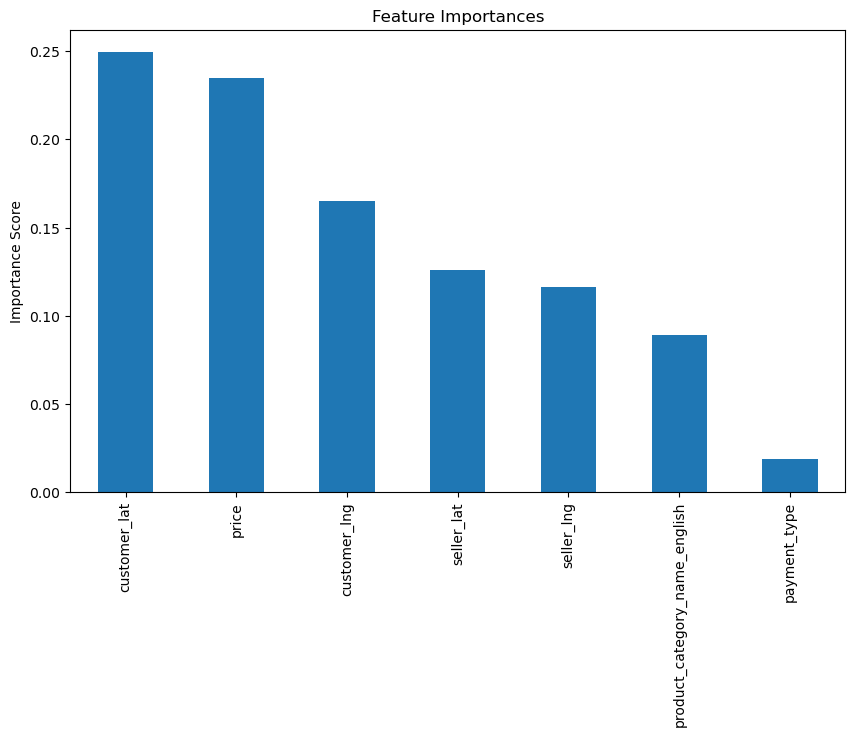

In [100]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()

# Conclusion:
- The model is highly effective at identifying delayed orders (class 1), with strong precision, recall, and F1-score for this class.
Non-delayed orders (class 0) are harder for the model to predict, as shown by lower recall (57%) and F1-score (64%). This could lead to false positives where some orders are predicted as delayed even when they aren't.
- The model's performance is skewed towards predicting delays due to the class imbalance, as most orders in the dataset are delayed. Addressing this imbalance (using techniques like resampling) could potentially improve performance for non-delayed orders.